Run on NERSC

In [1]:
from __future__ import division, print_function
import sys, os, glob, time, warnings, gc
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
from astropy.io import fits

In [2]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [3]:
def plot_cutout(img, pixscale, vmin=-1, vmax=1, unit='arcsec'):
    if unit=='arcsec':
        extent = 0.5*pixscale*img.shape[0]*np.array([-1, 1, -1, 1])
    elif unit=='arcmin':
        extent = 0.5*pixscale*img.shape[0]*np.array([-1, 1, -1, 1])/60.
    elif unit=='deg':
        extent = 0.5*pixscale*img.shape[0]*np.array([-1, 1, -1, 1])/3600.
    else:
        raise ValueError('unrecognized unit')
    fig, ax = plt.subplots(figsize=(8, 8))
    dens = ax.imshow(img, aspect='equal', 
               cmap='seismic', extent=extent, vmin=vmin, vmax=vmax)
    ax.axvline(0, ls='--', lw=0.5, color='grey')
    ax.axhline(0, ls='--', lw=0.5, color='grey')
    fig.colorbar(dens, fraction=0.046, pad=0.04)
    ax.grid(alpha=0.5)
    return ax

In [4]:
ccd = fitsio.read('/global/project/projectdirs/cosmo/work/legacysurvey/dr9/reorg/survey-ccds-decam-dr9-newlocs2.fits.gz')
ccd = Table(ccd)
print(len(ccd))

# Load Schlegel's CCD file list
fn = '/global/project/projectdirs/cosmo/work/users/djschleg/dr9lists/dr9c.txt'
with open(fn, 'r') as f:
    lines = list(map(str.rstrip, f.readlines()))
print(len(lines))
# print(lines[0])

ccd['basename'] = list(map(os.path.basename, ccd['image_filename']))
mask = np.in1d(ccd['basename'], np.array(lines))
print(np.sum(mask)/len(mask))
ccd = ccd[mask]
print(len(ccd))

3560028
2191
0.0371909996214
132401


44512
median = 1.78%


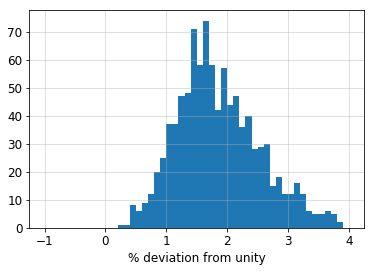

In [5]:
band = 'g'

ccd_mask = ccd['filter']==band
print(np.sum(ccd_mask))

idx = np.where(ccd_mask)[0]
nsamp = 1000
# nsamp = 10
if len(idx)>nsamp:
    np.random.seed(1)
    idx = np.random.choice(idx, size=nsamp, replace=False)
    
idx = idx[np.argsort(ccd['expnum'][idx])]

norm_list = np.zeros(nsamp)

for index, ccd_index in enumerate(idx):

    expnum = ccd['expnum'][ccd_index]
    ccdname = ccd['ccdname'][ccd_index]
    
    expnum_str = str(expnum)

    fn = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/calib/decam/psfex-merged/{}/decam-{}.fits'.format((5-len(expnum_str[:3]))*'0'+expnum_str[:3], (8-len(expnum_str))*'0'+expnum_str)
    
    hdu = fits.open(fn)
    data = hdu[1].data
    # print(data['psf_mask'].shape)

    which_ccd = np.where(data['ccdname']==ccdname)[0][0]
    psf = data['psf_mask'][which_ccd]
    # print(psf.shape)

    psf0 = psf[0]
    # normalize to a 22.5 magnitude star
    # print(np.sum(psf0))
    norm_list[index] = np.sum(psf0)-1

print('median = {:.2f}%'.format(100*np.median(norm_list)))
plt.hist(norm_list*100, 50, range=(-1, 4))
plt.xlabel('% deviation from unity')
plt.grid(alpha=0.5)
plt.show()

43276
median = 1.60%


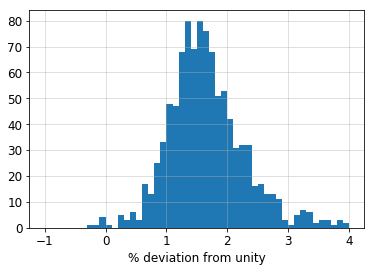

In [6]:
band = 'r'

ccd_mask = ccd['filter']==band
print(np.sum(ccd_mask))

idx = np.where(ccd_mask)[0]
nsamp = 1000
# nsamp = 10
if len(idx)>nsamp:
    np.random.seed(1)
    idx = np.random.choice(idx, size=nsamp, replace=False)
    
idx = idx[np.argsort(ccd['expnum'][idx])]

norm_list = np.zeros(nsamp)

for index, ccd_index in enumerate(idx):

    expnum = ccd['expnum'][ccd_index]
    ccdname = ccd['ccdname'][ccd_index]
    
    expnum_str = str(expnum)

    fn = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/calib/decam/psfex-merged/{}/decam-{}.fits'.format((5-len(expnum_str[:3]))*'0'+expnum_str[:3], (8-len(expnum_str))*'0'+expnum_str)
    
    hdu = fits.open(fn)
    data = hdu[1].data
    # print(data['psf_mask'].shape)

    which_ccd = np.where(data['ccdname']==ccdname)[0][0]
    psf = data['psf_mask'][which_ccd]
    # print(psf.shape)

    psf0 = psf[0]
    # normalize to a 22.5 magnitude star
    # print(np.sum(psf0))
    norm_list[index] = np.sum(psf0)-1

print('median = {:.2f}%'.format(100*np.median(norm_list)))
plt.hist(norm_list*100, 50, range=(-1, 4))
plt.xlabel('% deviation from unity')
plt.grid(alpha=0.5)
plt.show()

44613
median = 2.21%


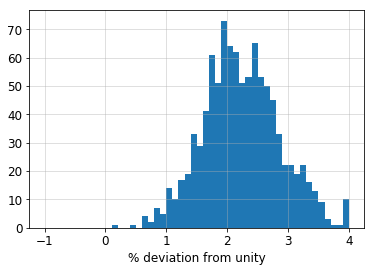

In [7]:
band = 'z'

ccd_mask = ccd['filter']==band
print(np.sum(ccd_mask))

idx = np.where(ccd_mask)[0]
nsamp = 1000
# nsamp = 10
if len(idx)>nsamp:
    np.random.seed(1)
    idx = np.random.choice(idx, size=nsamp, replace=False)
    
idx = idx[np.argsort(ccd['expnum'][idx])]

norm_list = np.zeros(nsamp)

for index, ccd_index in enumerate(idx):

    expnum = ccd['expnum'][ccd_index]
    ccdname = ccd['ccdname'][ccd_index]
    
    expnum_str = str(expnum)

    fn = '/global/project/projectdirs/cosmo/work/legacysurvey/dr9/calib/decam/psfex-merged/{}/decam-{}.fits'.format((5-len(expnum_str[:3]))*'0'+expnum_str[:3], (8-len(expnum_str))*'0'+expnum_str)
    
    hdu = fits.open(fn)
    data = hdu[1].data
    # print(data['psf_mask'].shape)

    which_ccd = np.where(data['ccdname']==ccdname)[0][0]
    psf = data['psf_mask'][which_ccd]
    # print(psf.shape)

    psf0 = psf[0]
    # normalize to a 22.5 magnitude star
    # print(np.sum(psf0))
    norm_list[index] = np.sum(psf0)-1

print('median = {:.2f}%'.format(100*np.median(norm_list)))
plt.hist(norm_list*100, 50, range=(-1, 4))
plt.xlabel('% deviation from unity')
plt.grid(alpha=0.5)
plt.show()